**Defining the question.**

**1 . Specifying the analytical question.** 

Investigate a claim about the blue cars from the provided Autolib dataset.



**2. Defining the metric of success**

The objective of this project is to investigate the claim listed above and know whether or not the the average number of blue cars taken is different that of the blue cars returned


**3. The context.**

We have been tasked to understand electric car usage. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. 


**4. Experimental design.** 

*   Loading the data set.
*   Checking and dealing with outliers, anomalies and   missing data within the dataset.

*  Plot  univariate and bivariate summaries recording our observations.

*  Implement the solution by performing hypothesis testing.

*  Challenge solution by providing insights on how you can make improvements. 

 





**5. Data relevance**

The data available is relevant as it has been obtained from Autolib network webpage which is a public car-sharing and recharging program in Paris, France.



DATA EXPLORATION.

In [5]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
# reading the dataset

Autolib_df = pd.read_csv("http://bit.ly/DSCoreAutolibDataset")


In [7]:
# previewing the dataset

Autolib_df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [8]:
# displaying the last 5 elements of the dataset

Autolib_df.tail(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


**CHECKING THE DATASET.**

In [9]:
# checking datatypes available

Autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [10]:
# checking number of rows and columns in the dataset

Autolib_df.shape

(16085, 13)

In [11]:
# Checking for duplicates

Autolib_df.duplicated().sum()

0

In [12]:
# ensuring all column names have the same format

Autolib_df.columns = Autolib_df.columns.str.lower().str.strip().str.replace(" ", "_")
Autolib_df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [13]:
# checking for null values

Autolib_df.isnull().sum()

postal_code               0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [14]:
# drop irrelevant fields
Autolib_df.drop(['date', 'n_daily_data_points', 'dayofweek' , 'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'], axis=1, inplace= True)
Autolib_df

,postal_code,day_type,bluecars_taken_sum,bluecars_returned_sum
0,75001,weekday,110,103
1,75001,weekday,98,94
2,75001,weekday,138,139
3,75001,weekday,104,104
4,75001,weekday,114,117
...,...,...,...,...
16080,95880,weekday,15,10
16081,95880,weekend,19,19
16082,95880,weekend,33,35
16083,95880,weekday,11,14


(16085, 4)
**************************
(12020, 4)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



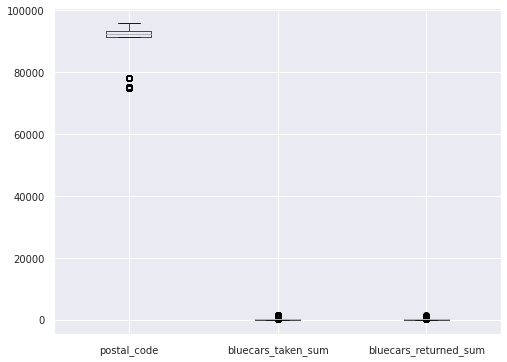

In [15]:
# checking for outliers

Autolib_df.boxplot(figsize= (8,6) , fontsize =10 )

# print size of data with outliers present

print(Autolib_df.shape)

print("**************************")

# removing outliers
# quantiles

Q1 = Autolib_df.quantile(0.25)
Q3 = Autolib_df.quantile(0.75)
IQR = Q3 - Q1

Autolib_2 = Autolib_df[~((Autolib_df < (Q1 - 1.5 * IQR)) | (Autolib_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# print size of data after removal of outliers

print(Autolib_2.shape)

In [16]:
# checking for anomalies
#
# calculating the lower and upper quantiles

q1_zipcode = Autolib_2["postal_code"].quantile(0.25)
q3_zipcode= Autolib_2["postal_code"].quantile(0.75)

# calculating inter-quartile range using values from above

iqr_zipcode = q3_zipcode - q1_zipcode

# alternative  fining quantiles using the percentiles from numpy library 

q1_z, q3_z = np.percentile(Autolib_2["postal_code"], [25, 75]) 

# interqaurtile range

iqr_z = q3_z - q1_z

# comparison  if the two values are similar
print(iqr_zipcode, iqr_z)

1730.0 1730.0


In [17]:
# Extracting  day type data

Autolib_3= Autolib_2[Autolib_2.day_type == 'weekend']
Autolib_3

,postal_code,day_type,bluecars_taken_sum,bluecars_returned_sum
3904,91330,weekend,6,11
3905,91330,weekend,28,17
3911,91330,weekend,24,21
3912,91330,weekend,27,30
3918,91330,weekend,16,10
...,...,...,...,...
16068,95880,weekend,36,33
16074,95880,weekend,15,15
16075,95880,weekend,34,32
16081,95880,weekend,19,19


In [18]:
# displaying the unique datatypes

Autolib_3.nunique()

postal_code               79
day_type                   1
bluecars_taken_sum       265
bluecars_returned_sum    259
dtype: int64

**EXPLORATORY DATA ANALYSIS.**


UNIVARIATE ANALYSIS


In [19]:
# Describing the  numerical variables
Autolib_3[['bluecars_taken_sum','bluecars_returned_sum']].describe()


,bluecars_taken_sum,bluecars_returned_sum
count,3381.000000,3381.000000
mean,60.013310,59.763679
std,53.647062,54.225134
min,0.000000,0.000000
25%,21.000000,20.000000
50%,44.000000,43.000000
75%,85.000000,85.000000
max,301.000000,306.000000


Text(0.5, 1.0, 'distribution of blue cars taken')

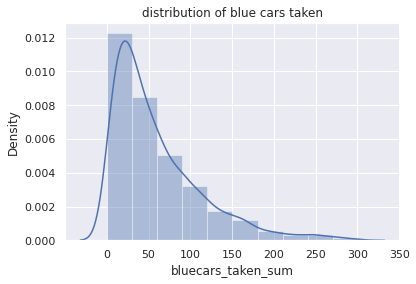

In [20]:
# Plotting bluecars taken

import warnings
warnings.filterwarnings("ignore")

sns.distplot(Autolib_3['bluecars_taken_sum'], bins=10)
plt.title('distribution of blue cars taken')

Text(0.5, 1.0, 'distribution of blue cars returned')

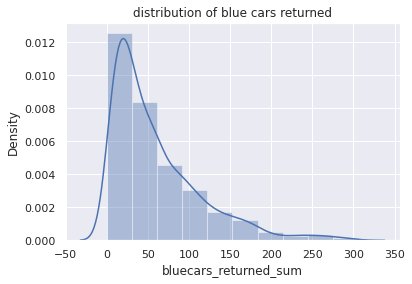

In [21]:
# Plotting  bluecars returned 

sns.distplot(Autolib_3['bluecars_returned_sum'], bins=10)
plt.title('distribution of blue cars returned')


Text(0, 0.5, 'count of bluecars taken')

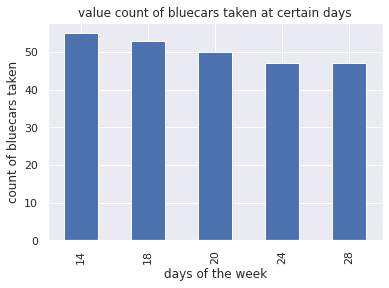

In [22]:
# plot for count of blue cars taken at certain days intervals

Autolib_3['bluecars_taken_sum'].value_counts().head().plot.bar()

# formatting and labelling chart

plt.title("value count of bluecars taken at certain days")
plt.xlabel("days of the week")
plt.ylabel("count of bluecars taken")

Text(0, 0.5, 'count of bluecars taken')

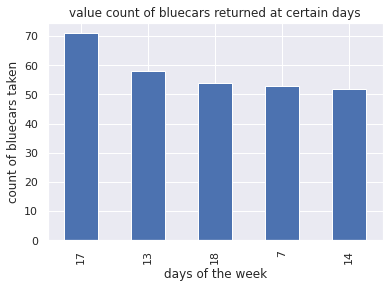

In [23]:
# plot for count of blue cars returned at certain days intervals

Autolib_3['bluecars_returned_sum'].value_counts().head().plot.bar()

# formatting and labelling chart

plt.title("value count of bluecars returned at certain days")
plt.xlabel("days of the week")
plt.ylabel("count of bluecars taken")



In [24]:
# converting postal code from an integer to a string

Autolib_3['postal_code'] = Autolib_3['postal_code'].apply(str)
print(Autolib_3.dtypes)

postal_code              object
day_type                 object
bluecars_taken_sum        int64
bluecars_returned_sum     int64
dtype: object


BIVARIATE ANALYSIS

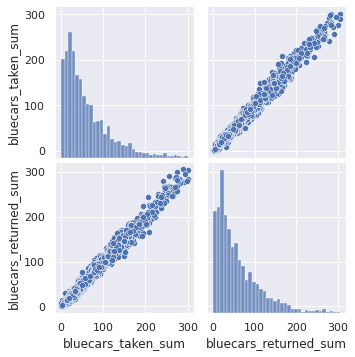

In [25]:
# plotting the bivariate summaries and recording the observations in scatterplots

sns.pairplot(Autolib_3)

Text(0.5, 1.0, 'bluecars_taken vs bluecars_returned_sum')

<Figure size 864x1080 with 0 Axes>

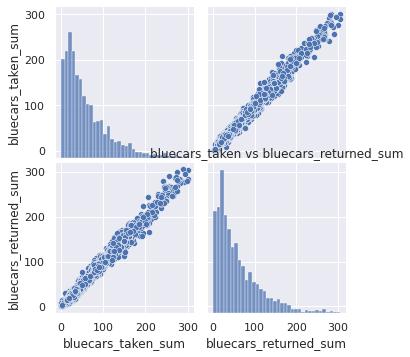

In [26]:
# Determining  correlation between numerical features

plt.figure(figsize=(12,15))
sns.pairplot(Autolib_3[['bluecars_taken_sum','bluecars_returned_sum']])
plt.title('bluecars_taken vs bluecars_returned_sum')

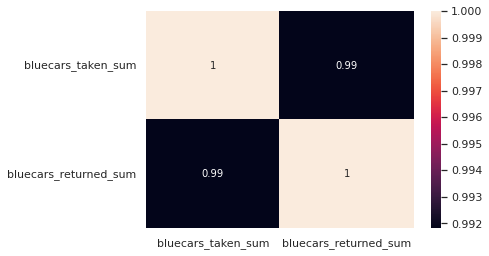

In [27]:
# checking level of correlation by plotting data to a heatmap

sns.heatmap(Autolib_3.corr(),annot=True)
plt.show()

**HYPOTHESIS TESTING**

The Null hypothesis is set as :

> the average number of blue cars taken is not different that of the blue cars returned?

Whereas the Alternative hypothesis/ claim is set as:

> the average number of blue cars taken is different to that of the blue cars returned.


In [28]:
# dropping day type column

Autolib_3.drop(['day_type'], axis=1, inplace=True)
Autolib_3


,postal_code,bluecars_taken_sum,bluecars_returned_sum
3904,91330,6,11
3905,91330,28,17
3911,91330,24,21
3912,91330,27,30
3918,91330,16,10
...,...,...,...
16068,95880,36,33
16074,95880,15,15
16075,95880,34,32
16081,95880,19,19


In [29]:
# visualization styling code

sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

In [30]:
# displaying row count
Autolib_3.count()

postal_code              3381
bluecars_taken_sum       3381
bluecars_returned_sum    3381
dtype: int64

In [31]:
#  undertaking Normality test

from scipy.stats import shapiro

def shapiro_test(Aut, col_list):
    for x in col_list:
        print(x)
        data = Aut[x]
        stat, p = shapiro(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
        print('\n')

# undertaking shapiro Wilk's test

shapiro_test(Autolib_3, list(Autolib_3.columns))

postal_code
Statistics=0.926, p=0.000
Sample does not look Gaussian (reject H0)


bluecars_taken_sum
Statistics=0.856, p=0.000
Sample does not look Gaussian (reject H0)


bluecars_returned_sum
Statistics=0.850, p=0.000
Sample does not look Gaussian (reject H0)




*STRATIFIED SAMPLING*

In [32]:
# importing libraries

import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import time                   
import warnings              
import numpy as np            
import pandas as pd            
import matplotlib.pyplot as plt                   
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import StandardScaler  
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn.mixture import GaussianMixture 
import os                     
import sys  

In [33]:
# performing a stratified sample
Auto = Autolib_3.groupby('postal_code', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
Auto


,postal_code,bluecars_taken_sum,bluecars_returned_sum
4037,91330,25,22
3979,91330,15,14
3933,91330,21,14
3985,91330,6,11
4120,91370,11,9
...,...,...,...
15792,95870,18,14
15995,95880,40,31
15970,95880,26,20
15969,95880,13,15


In [34]:
# mean of blue cars taken from original dataset

m_1 = Autolib_df['bluecars_taken_sum'].mean()
m_1

125.92695057506994

In [35]:
# mean of blue cars returned from original dataset

m_2 = Autolib_df['bluecars_returned_sum'].mean()
m_2

125.912713708424

In [36]:
# sample mean from starified sample for blue cars taken

m_3=Auto['bluecars_taken_sum'].mean()
m_3

60.042071197411005

In [37]:
# sample mean from starified sample for blue cars returned

m_4= Auto['bluecars_returned_sum'].mean()
m_4


60.16181229773463

In [38]:
# calculating sample standard deviation for blue cars taken

sd_1= Auto['bluecars_taken_sum'].std()
sd_1

55.325437805981124

In [39]:
# calculating the z-score
zscore = (m_3-m_1) / sd_1
zscore

-1.1908605153511547

In [40]:
#calculating the p value

import scipy.stats
scipy.stats.norm.sf(abs(-1.2251668935832125))


0.1102561727001386

In [41]:
#interpretation of the p value

if 0.1102561727001386 < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we fail to reject null hypothesis")

we fail to reject null hypothesis


In [42]:
# undertaking point estimation
# population.mean() - sample.mean()
# we will use the mean for the blue cars that were taken

Autolib_df['bluecars_taken_sum'].mean() - Auto['bluecars_taken_sum'].mean()

65.88487937765893

In [43]:
import math
import scipy.stats

sample_mean = Auto['bluecars_taken_sum'].mean()

z_critical = scipy.stats.norm.sf(abs(0.975))

 # Get the z-critical value*

print("z-critical value:")              

# Check the z-critical value
print(z_critical)                        

pop_stdev = Autolib_df['bluecars_taken_sum'].std()  

# Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(296))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
0.16478012998031033
Confidence interval:
(58.26612023051733, 61.81802216430468)


**CLUSTER SAMPLING**

<function matplotlib.pyplot.show(*args, **kw)>

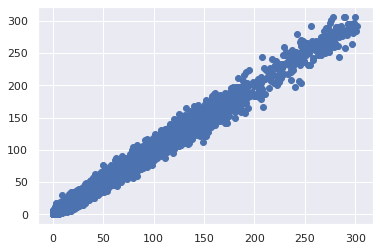

In [44]:
plt.scatter(Autolib_2['bluecars_taken_sum'],Autolib_2['bluecars_returned_sum'])
plt.show

In [45]:
x = Autolib_3.iloc[:, 2:4]
x


,bluecars_returned_sum
3904,11
3905,17
3911,21
3912,30
3918,10
...,...
16068,33
16074,15
16075,32
16081,19


In [48]:
# vector quantization

kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [49]:
# finding the array of the clusters

identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [50]:
#identifying how well the dataset has been clustered via k menans

kmeans.inertia_

3193878.023542083

In [51]:
# Create a copy of the data

Autolib_4 = Autolib_3.copy()

# Create a new Series, containing the identified cluster for each observation

Autolib_4['Cluster'] = identified_clusters

# Check the result

Autolib_4

,postal_code,bluecars_taken_sum,bluecars_returned_sum,Cluster
3904,91330,6,11,1
3905,91330,28,17,1
3911,91330,24,21,1
3912,91330,27,30,1
3918,91330,16,10,1
...,...,...,...,...
16068,95880,36,33,1
16074,95880,15,15,1
16075,95880,34,32,1
16081,95880,19,19,1


In [52]:
#Scaling of data

ss = StandardScaler()
ss.fit_transform(Autolib_4)

array([[-1.75782372, -1.00697592, -0.89941488,  0.53802759],
       [-1.75782372, -0.59682756, -0.78874872,  0.53802759],
       [-1.75782372, -0.67139999, -0.71497128,  0.53802759],
       ...,
       [ 2.76750748, -0.48496892, -0.51208331,  0.53802759],
       [ 2.76750748, -0.76461553, -0.75186   ,  0.53802759],
       [ 2.76750748, -0.50361203, -0.45675023,  0.53802759]])

In [53]:
def doGMM(X, nclust=2):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(X)
    clust_labels3 = model.predict(X)
    return (clust_labels3)

clust_labels3 = doGMM(Autolib_4,2)
gmm = pd.DataFrame(clust_labels3)
Autolib_4.insert((Autolib_4.shape[1]),'gmm',gmm)

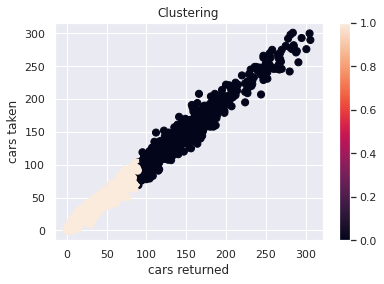

In [54]:
#Plotting the cluster obtained using GMM

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(Autolib_4['bluecars_returned_sum'],Autolib_4['bluecars_taken_sum'],
                     c=gmm[0],s=50)
ax.set_title('Clustering')
ax.set_xlabel('cars returned')
ax.set_ylabel('cars taken')
plt.colorbar(scatter)

**CONCLUSION**

From the observations made above, there is not sufficient evidence to prove that the average means of the blue cars taken and returned are not equal.

We therefore fail to reject the null hypothesis.